Type your password and press enter:strong@arms123
Email Sent Successfully!


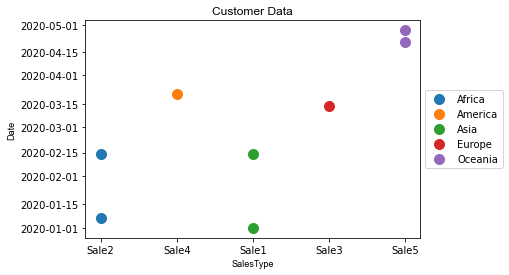

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from datetime import *
import smtplib, ssl
from email.mime.text import MIMEText
from email.mime.image import MIMEImage
from email.mime.multipart import MIMEMultipart


sender_email = "danarms.2421@gmail.com"
receiver_emails = ["danarms.2421@gmail.com", "falbar.2421@gmail.com"]
password = input("Type your password and press enter:")

message = MIMEMultipart("alternative")
message["Subject"] = "Region Based Sales Report"
message["From"] = sender_email
message["To"] = ", ".join(receiver_emails)

data = [['Sale1','Asia', '1/1/2020'], ['Sale2','Africa', '1/7/2020'], ['Sale1','Asia', '2/14/2020'], ['Sale2','Africa', '2/14/2020'], ['Sale3','Europe', '3/14/2020'], ['Sale4','America', '3/21/2020'], ['Sale5','Oceania', '4/21/2020'], ['Sale5','Oceania', '4/28/2020']]
df = pd.DataFrame(data,columns=['SalesType','Region','Date'])

scatter_x = np.array(df['SalesType'])
scatter_y = np.array(pd.to_datetime(df['Date']))
group = np.array(df['Region'])

fig, ax = plt.subplots()  
for g in np.unique(group):
    ix = np.where(group == g)
    rgb = np.random.seed(3)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = rgb, label = g, s = 100)

ax.set_xlabel('SalesType', family='Arial', fontsize=9)
ax.set_ylabel('Date', family='Arial', fontsize=9)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Customer Data', family='Arial', fontsize=12)
plt.savefig('Sales_Graph.png', dpi=100, bbox_inches = "tight")
attachment = 'Sales_Graph.png'

fp = open(attachment, 'rb')
img = MIMEImage(fp.read())
fp.close()
img.add_header('Content-ID', '<{}>'.format(attachment))

html = """\
    <html>
     <body>
        <p>Hi!
            <br>Hope your are doing well
             <br>
                 <b>Sales Report<br></p>
                    <p><img src="cid:Sales_Graph.png" alt="Sales Scatter Graph"></p>
            </body>
    </html>"""

msg = MIMEText(html, "html")
message.attach(msg)
message.attach(img)
context = ssl.create_default_context()

try:
    with smtplib.SMTP_SSL("smtp.gmail.com", 465, context=context) as server:
        server.login(sender_email, password)
        server.sendmail(sender_email, receiver_emails, message.as_string())
        print ("Email Sent Successfully!")
except SMTPException:
    print ("Error: Unable to Send Email.")